**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Marcos Eduardo García Ortiz
*   MATRÍCULA: A01276213

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Maestria/Primer Trimstre/Ciencia de datos/Colab notebooks/Actividad 4"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

-  8 columnas son de valores númericos int o float
-  4 columnas son de valores cualitativos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 2. Determina el porcentaje de valores faltantes por columna.

In [ ]:
porcentage_list = df.isnull().sum()/len(df)*100
for columna, valor in porcentage_list.items():
    print(f"{columna}: {valor:.3f} %")

person_age: 0.000 %
person_income: 0.000 %
person_home_ownership: 0.000 %
person_emp_length: 2.747 %
loan_intent: 0.000 %
loan_grade: 0.000 %
loan_amnt: 0.000 %
loan_int_rate: 9.564 %
loan_status: 0.000 %
loan_percent_income: 0.000 %
cb_person_default_on_file: 0.000 %
cb_person_cred_hist_length: 0.000 %


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**Clasificación de `person_age` y `loan_in_rate` con skew()**

person_age tiene un valor de 2.581 al ser un valor positivo lo que nos indica que la cola derecha es mas larga que la cola izquierda, es decir que la distribución esta sesgada a la derecha, si seleccionas un punto en el lado derecho el valor promedio es mas grande que la moda


loan_int_rate tiene un valor de 0.208 es un valor positivo por lo que la cola derecha es mas larga que la izquierda, es un valor cercano a cero pero no lo suficiente para ser simetrica


In [ ]:
# Asimetria del df
df.skew(numeric_only=True)

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [ ]:
df.mean()

<ipython-input-10-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


person_age                       27.734600
person_income                 66074.848470
person_emp_length                 4.789686
loan_amnt                      9589.371106
loan_int_rate                    11.011695
loan_status                       0.218164
loan_percent_income               0.170203
cb_person_cred_hist_length        5.804211
dtype: float64

In [ ]:
df.mode()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,60000,RENT,0.0,EDUCATION,A,10000,7.51,0,0.1,N,2


**Clasificación de `person_age` y `loan_in_rate` con kurt()**

person_age tiene un valor de 18.56 al ser mayor que 3 es leptokurtic al ser colas gruesas indica que la distribución produce más datos atipicos

loan_int_rate tiene un valor de -0.67 al ser un valor negativo lejos de cero es platykurtic donde las colas son muy delgadas

In [ ]:
df.kurt(numeric_only=True)

person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

Mediante los siguientes histogramas podemos observar que para person_age se cumplen los cálculos de asimetría y curtosis siguiendo una distribución sin embargo para loan_int_rate resulta díficil determinar estos calculos ya que sus distribución varía de una manera peculiar

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_status'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>, <Axes: >]],
      dtype=object)

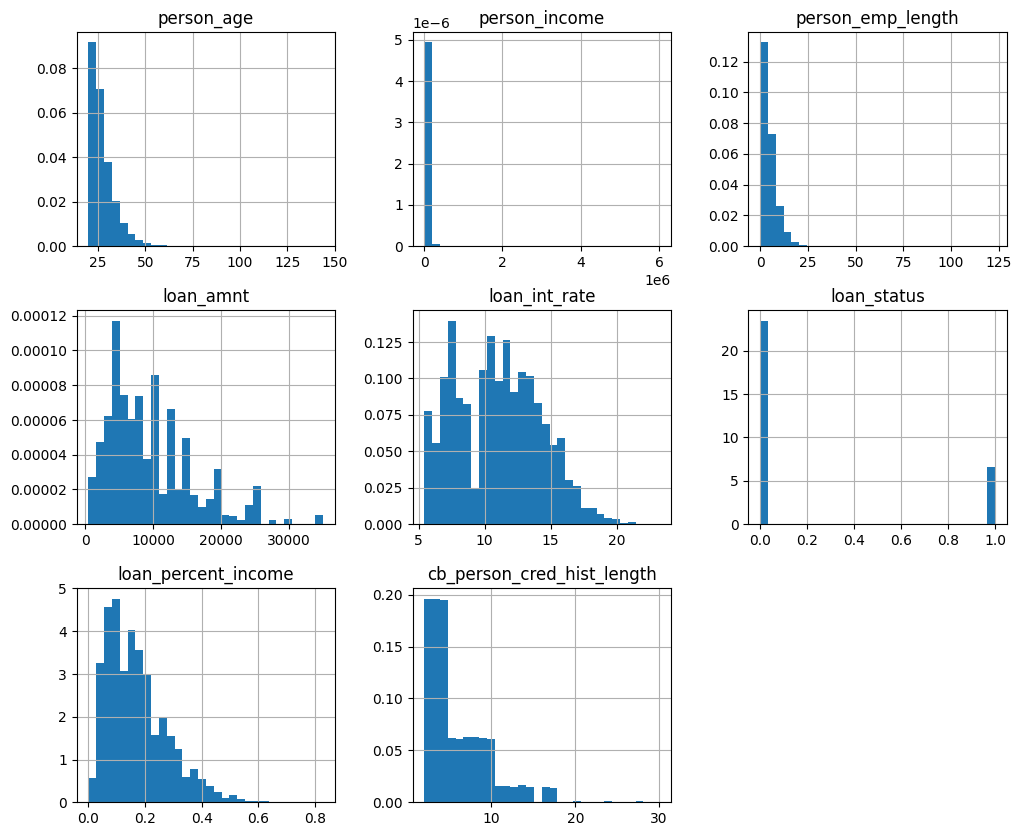

In [ ]:
df.hist(figsize=(12,10), density=True, bins=30)

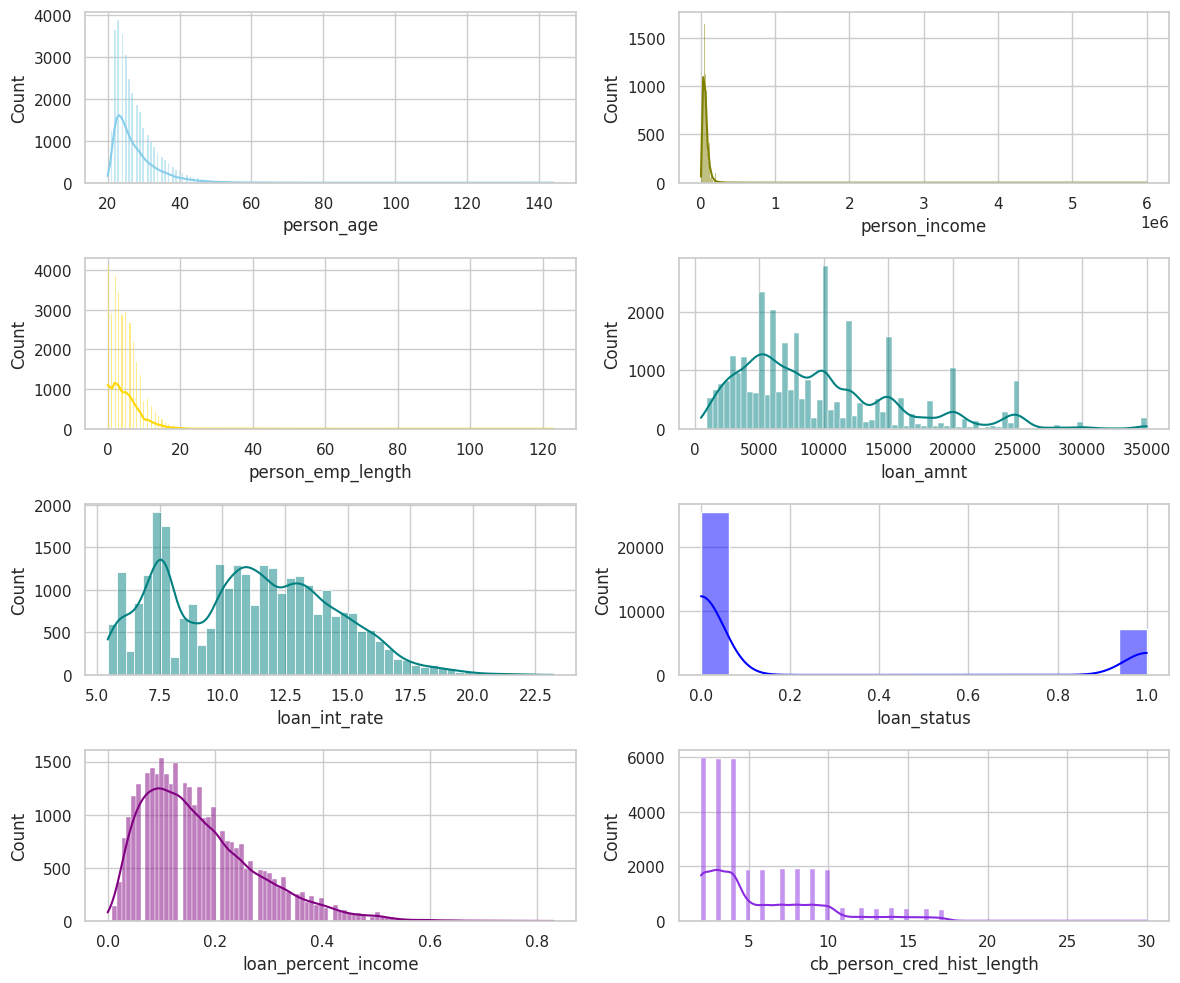

In [ ]:
sns.set(style="whitegrid")
fig,axs = plt.subplots(4,2, figsize = (12,10))
sns.histplot(data=df, x="person_age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="person_income", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="person_emp_length", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="loan_amnt", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="loan_int_rate", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=df, x="loan_status", kde=True, color="blue", ax=axs[2, 1])
sns.histplot(data=df, x="loan_percent_income", kde=True, color="purple", ax=axs[3,0])
sns.histplot(data=df, x="cb_person_cred_hist_length", kde=True, color="blueviolet", ax=axs[3,1])
fig.tight_layout()

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

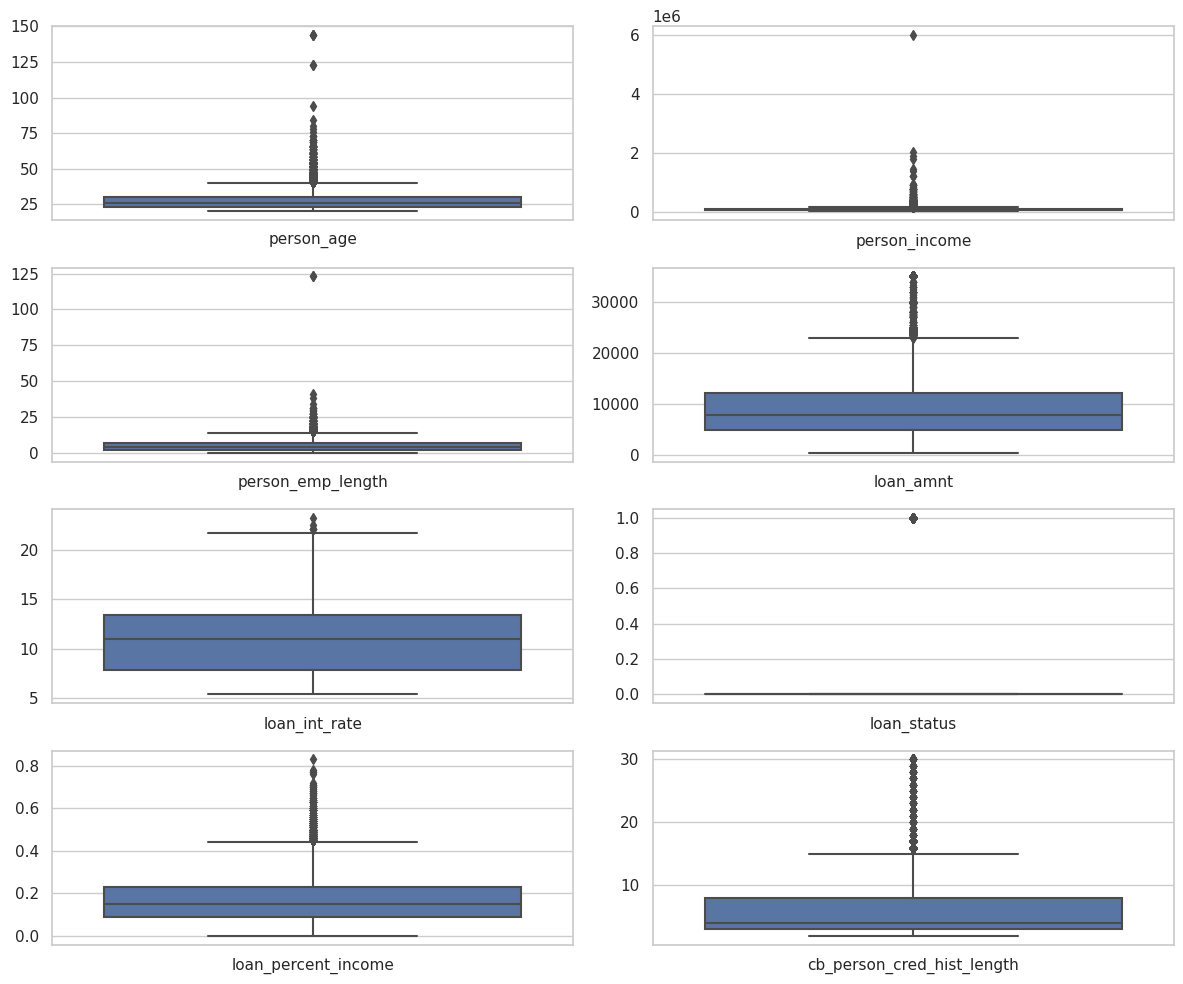

In [ ]:
sns.set(style="whitegrid")
#sns.histplot(data=df, x="person_age", kde=True, color="skyblue", ax=axs[0, 0])
fig,axs = plt.subplots(4,2, figsize = (12,10))
sns.boxplot(data=df[['person_age']], ax=axs[0,0])
sns.boxplot(data=df[['person_income']], ax=axs[0,1])
sns.boxplot(data=df[['person_emp_length']], ax=axs[1,0])
sns.boxplot(data=df[['loan_amnt']], ax=axs[1,1])
sns.boxplot(data=df[['loan_int_rate']], ax=axs[2,0])
sns.boxplot(data=df[['loan_status']], ax=axs[2,1])
sns.boxplot(data=df[['loan_percent_income']], ax=axs[3,0])
sns.boxplot(data=df[['cb_person_cred_hist_length']], ax=axs[3,1])
fig.tight_layout()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [ ]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables categóricas

 6. Obtén las siguientes estadísticas descriptivas para todas las variables categóricas:
*   Tendencia central (moda)
      Para cada categoria como se observa con describe la moda es RENT, EDUCATION,A,N para cada categoría respectivamente
*   Cardinalidad (cantidad de valores únicos)
      Para cada categoria se tienen 4,6,7,2 valores unicos respectivamente
*   Recuentos únicos (número de ocurrencias para cada valor único)
      

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object, que en este caso coinciden con las categóricas: `describe(include = 'object')`. Para los recuentos utiliza la función `df["columna"].value_counts()`

In [ ]:
df.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [ ]:
df.mode()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,60000,RENT,0.0,EDUCATION,A,10000,7.51,0,0.1,N,2


# Recuentos únicos (número de ocurrencias para cada valor único)

In [ ]:
df['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [ ]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [ ]:
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [ ]:
df['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

# 7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables categóricas, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x="columna", data=df) `

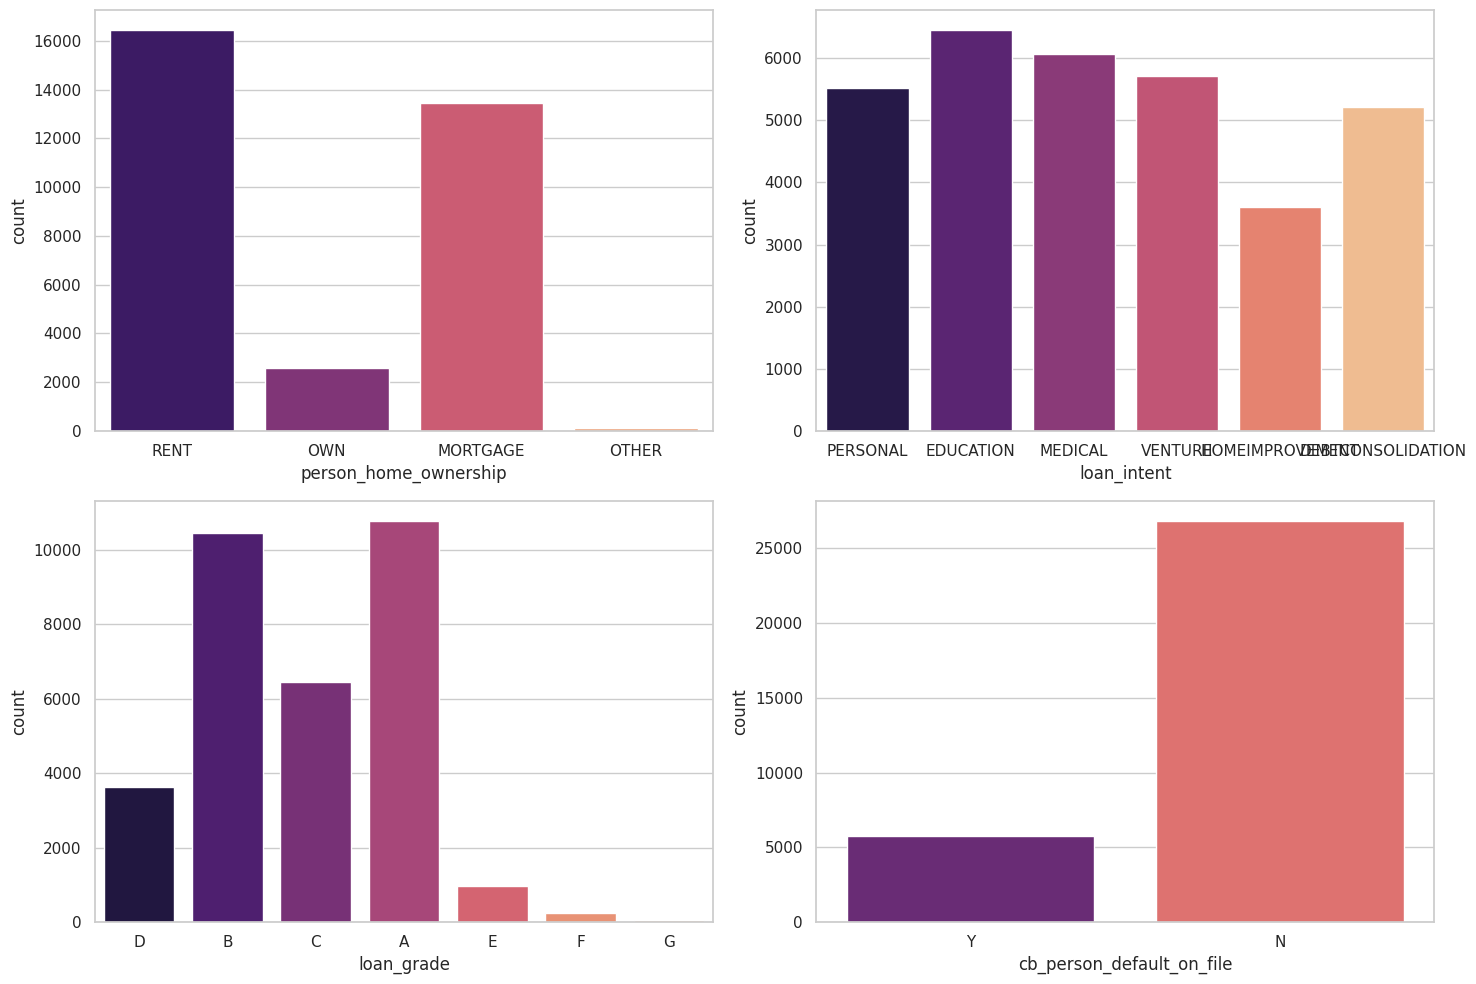

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (15,10))
sns.countplot(data=df, x="person_home_ownership", ax=axs[0,0], palette='magma')
sns.countplot(data=df, x='loan_intent', ax=axs[0,1], palette='magma')
sns.countplot(data=df, x="loan_grade", ax=axs[1,0], palette='magma')
sns.countplot(data=df, x="cb_person_default_on_file", ax=axs[1,1], palette='magma')
fig.tight_layout()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

De esta relación lo que podemos visualizar es como el porcentage de prestamo sobre el ingreso se comporta en base a las personas que cumplen y no con su prestamo, la mediana que es la línea dentro del cuadro nos indica que para aquello que estan en mora tienen un mayor porcentage de prestamo aprox un 22%, las personas que cumplen con su prestamo no deben dar una gran cantidad de su salario 15%


Aquellas personas que ya tienen un incumplimiento con su pago deben realizar una mayor contribución de su salario para cubrir la deuda

Respecto a los outliers podemos ver que se presentan mas en las personas que cumplen con sus pagos mientras que los que incumplen al tener que dar una mayor parte sus valores se encuentrar dentro del maximo.

<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

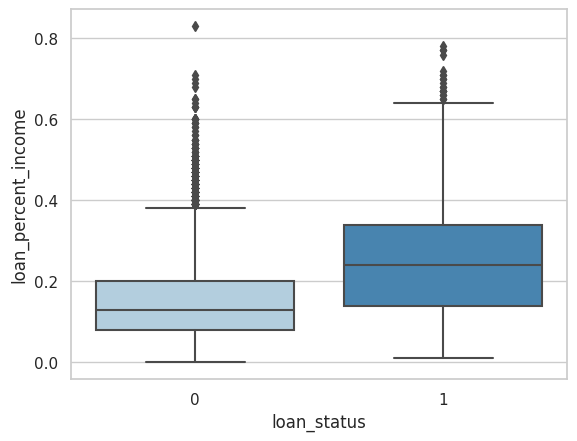

In [ ]:
sns.boxplot(data=df,y='loan_percent_income',x='loan_status',palette="Blues")


 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `loan_status`, utilizando el parámetro `hue`.

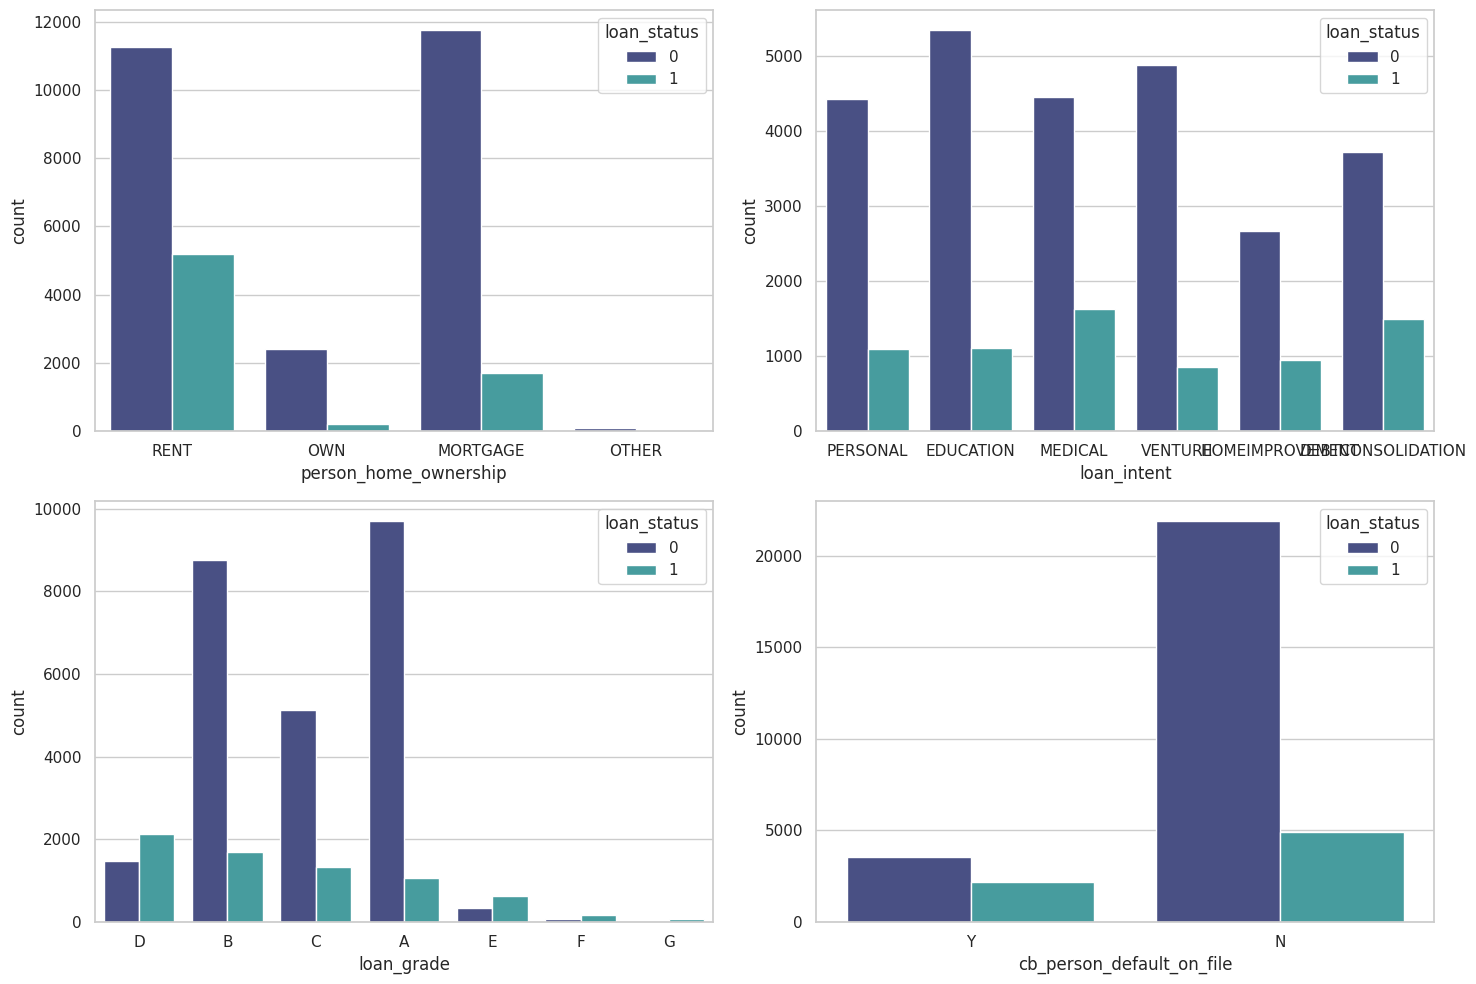

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (15,10))
sns.countplot(data=df, x="person_home_ownership", hue='loan_status', ax=axs[0,0], palette='mako')
sns.countplot(data=df, x='loan_intent', hue='loan_status', ax=axs[0,1], palette='mako')
sns.countplot(data=df, x="loan_grade", hue='loan_status', ax=axs[1,0], palette='mako')
sns.countplot(data=df, x="cb_person_default_on_file", hue='loan_status', ax=axs[1,1], palette='mako')
fig.tight_layout()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

loan_percent_income y loan_int_rate son las variables que mas relación tienen con loan_status

<Axes: >

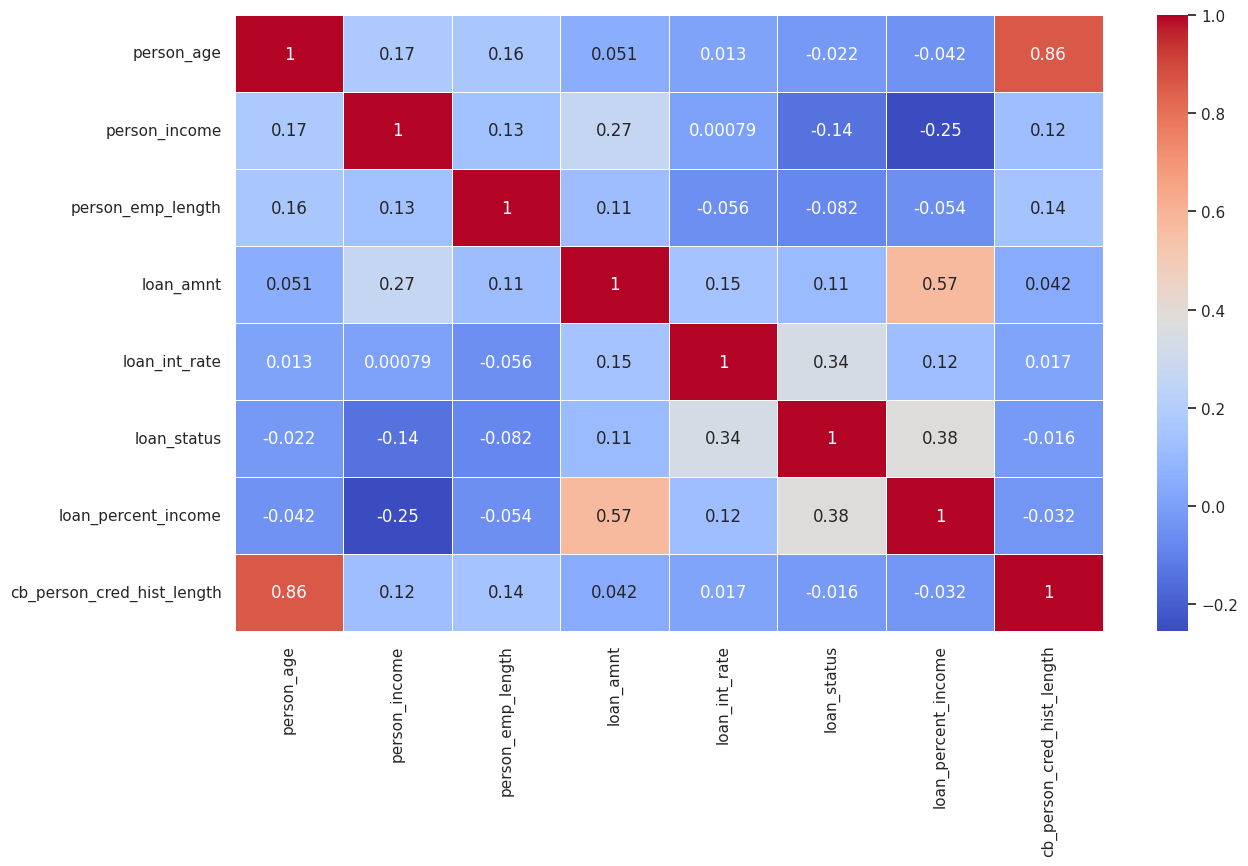

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)